In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('Housing.csv')

In [5]:
data = pd.get_dummies(data)

In [7]:
data.values

array([[13300000,     7420,        4, ...,        1,        0,        0],
       [12250000,     8960,        4, ...,        1,        0,        0],
       [12250000,     9960,        3, ...,        0,        1,        0],
       ...,
       [ 1750000,     3620,        2, ...,        0,        0,        1],
       [ 1750000,     2910,        3, ...,        1,        0,        0],
       [ 1750000,     3850,        3, ...,        0,        0,        1]],
      dtype=int64)

In [27]:
from sklearn.decomposition import IncrementalPCA

In [29]:
model = IncrementalPCA(n_components = 2)

In [30]:
model.fit(data.values)

IncrementalPCA(n_components=2)

In [31]:
model.fit_transform(data.values)

array([[ 8.53327051e+06, -3.03721995e+03],
       [ 7.48327167e+06, -8.44245384e+02],
       [ 7.48327230e+06,  1.55754562e+02],
       ...,
       [-3.01672962e+06,  3.45505425e+02],
       [-3.01673006e+06, -3.64494508e+02],
       [-3.01672947e+06,  5.75505278e+02]])

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = data.drop('price',axis=1)
y = data.price

r2s = []
for i in range(1,20):
    model = IncrementalPCA(n_components = i)
    new_x = model.fit_transform(x)
    linear_model = LinearRegression()
    linear_model.fit(new_x,y)
    pred = linear_model.predict(new_x)
    r2s.append(r2_score(pred,y))

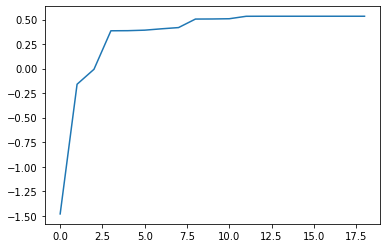

In [39]:
import matplotlib.pyplot as plt

plt.plot(range(len(r2s)),r2s)

In [50]:
model = IncrementalPCA(n_components = 10)
new_x = model.fit_transform(x)

In [51]:
linear_model.fit(new_x,y)

LinearRegression()

In [52]:
r2_score(linear_model.predict(new_x),y)

0.5054092329047072